<a href="https://colab.research.google.com/github/EricTheProgrammer342/Homework1_BigData/blob/main/Homework_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.4085 - val_loss: 0.2014
Epoch 2/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1906 - val_loss: 0.1645
Epoch 3/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1597 - val_loss: 0.1448
Epoch 4/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1413 - val_loss: 0.1312
Epoch 5/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1293 - val_loss: 0.1222
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1201 - val_loss: 0.1131
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1130 - val_loss: 0.1073
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1074 - val_loss: 0.1031
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1034 - val_loss: 0.1001
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1005 - val_loss: 0.0975
Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0983 - 

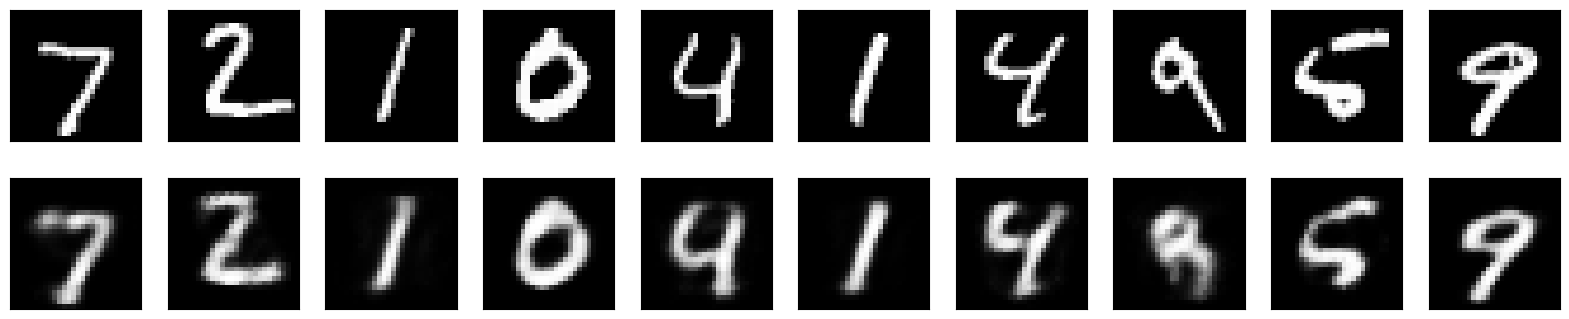

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import TerminateOnNaN
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TerminateOnNaN

# Load the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize the images to values between 0 and 1
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Flatten the 28x28 images to a 784 vector
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Define the dimensions of the input and the encoded representation
input_dim = x_train.shape[1]
encoding_dim = 32  # Compress to 32 features

# Define the input layer
input_layer = Input(shape=(input_dim,))

# Define the encoder
encoded = Dense(encoding_dim, activation='relu')(input_layer)

# Define the decoder
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# Combine the encoder and decoder into an autoencoder model
autoencoder = Model(input_layer, decoded)

# Compile the autoencoder model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(x_train, x_train, epochs=5, batch_size=256, shuffle=True, validation_split=0.2)

encoder = Model(input_layer, encoded)

encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

#amendment
# Define EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=5,  # Number of epochs with no improvement after which training will be stopped
                               restore_best_weights=True)  # Restores model to best weights with the lowest validation loss
#commented
#amendment
autoencoder.fit(x_train, x_train,  # For autoencoders, input and output are the same
                epochs=5,  # Set the number of epochs
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[terminate_on_nan])  # Add the TerminateOnNaN callback

#amendment
# EarlyStopping callback to stop training if validation loss stops improving
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


#commented
# Training with multiple callbacks
autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[terminate_on_nan, early_stopping])  # Using both callbacks

#Amendmnent
#Assuming x_train and x_test are your training and test datasets
autoencoder.fit(x_train, x_train,  # For autoencoders, input and output are the same
                epochs=5,  # Set a high number of epochs
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[early_stopping])  # Add the early stopping callback

# Amendment
# Define the ModelCheckpoint callback
checkpoint = ModelCheckpoint(filepath='autoencoder_best.keras',  # Use `.keras` instead of `.h5`
                             monitor='val_loss',  # Metric to monitor
                             save_best_only=True,  # Save only the best model (based on the monitored metric)
                             mode='min',  # Minimize the monitored metric (e.g., validation loss)
                             save_weights_only=False,  # Save the entire model (set to True to save only weights)
                             verbose=1)  # Print a message when saving the model
# amendment
# Assuming x_train and x_test are your training and validation datasets
autoencoder.fit(x_train, x_train,  # For autoencoders, input and output are the same
                epochs=50,  # Number of epochs
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test),  # Validation data
                callbacks=[checkpoint])  # Add the ModelCheckpoint callback

#Amendment
# Define the ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss',  # Metric to monitor
                              factor=0.5,  # Factor by which the learning rate will be reduced (new_lr = lr * factor)
                              patience=3,  # Number of epochs with no improvement after which learning rate will be reduced
                              min_lr=1e-6,  # Lower bound for the learning rate
                              verbose=1)  # Print message when the learning rate is reduced

#amendment
# Assuming x_train and x_test are your training and validation datasets
autoencoder.fit(x_train, x_train,  # For autoencoders, input and output are the same
                epochs=50,  # Number of epochs
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test),  # Validation data
                callbacks=[reduce_lr])  # Add the ReduceLROnPlateau callback

# EarlyStopping callback to stop training if validation loss stops improving
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

#checkpoint = ModelCheckpoint(filepath='autoencoder_best.h5', monitor='val_loss', save_best_only=True, verbose=1)
# Amendment
# ModelCheckpoint callback to save the best model based on validation loss
checkpoint = ModelCheckpoint(filepath='autoencoder_best.keras',  # Use `.keras` instead of `.h5`
                             monitor='val_loss',  # Metric to monitor
                             save_best_only=True,  # Save only the best model (based on the monitored metric)
                             mode='min',  # Minimize the monitored metric (e.g., validation loss)
                             save_weights_only=False,  # Save the entire model (set to True to save only weights)
                             verbose=1)  # Print a message when saving the model

# TerminateOnNaN callback to stop training if the loss becomes NaN
terminate_on_nan = TerminateOnNaN()

# Training with multiple callbacks
autoencoder.fit(x_train, x_train,
                epochs=100,  # You can set a high number of epochs
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[reduce_lr, early_stopping, checkpoint, terminate_on_nan])  # Using multiple callbacks

#Amendment
# Define the TerminateOnNaN callback
terminate_on_nan = TerminateOnNaN()

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # abstract
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # new stuff
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Define the input and encoding layers
input_dim = 784  # Example for flattened 28x28 images (like MNIST)
encoding_dim = 64  # Dimensionality of latent space

input_img = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# Build the autoencoder model
autoencoder = Model(input_img, decoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Define EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=5,  # Number of epochs with no improvement after which training will be stopped
                               restore_best_weights=True)  # Restores model to best weights with the lowest validation loss

In [ ]:
# Assuming x_train and x_test are your training and test datasets
autoencoder.fit(x_train, x_train,  # For autoencoders, input and output are the same
                epochs=100,  # Set a high number of epochs
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[early_stopping])  # Add the early stopping callback

In [ ]:
from tensorflow.keras.callbacks import TerminateOnNaN

# Define the TerminateOnNaN callback
terminate_on_nan = TerminateOnNaN()


In [ ]:
# Assuming x_train and x_test are your training and validation datasets
autoencoder.fit(x_train, x_train,  # For autoencoders, input and output are the same
                epochs=100,  # Set the number of epochs
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[terminate_on_nan])  # Add the TerminateOnNaN callback


In [ ]:
# EarlyStopping callback to stop training if validation loss stops improving
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Training with multiple callbacks
autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[terminate_on_nan, early_stopping])  # Using both callbacks


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the ModelCheckpoint callback
checkpoint = ModelCheckpoint(filepath='autoencoder_best.h5',  # File path to save the model
                             monitor='val_loss',  # Metric to monitor
                             save_best_only=True,  # Save only the best model (based on the monitored metric)
                             mode='min',  # Minimize the monitored metric (e.g., validation loss)
                             save_weights_only=False,  # Save the entire model (set to True to save only weights)
                             verbose=1)  # Print a message when saving the model


In [ ]:
# Assuming x_train and x_test are your training and validation datasets
autoencoder.fit(x_train, x_train,  # For autoencoders, input and output are the same
                epochs=50,  # Number of epochs
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test),  # Validation data
                callbacks=[checkpoint])  # Add the ModelCheckpoint callback


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, TerminateOnNaN

# EarlyStopping callback to stop training if validation loss stops improving
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# TerminateOnNaN callback to stop training if the loss becomes NaN
terminate_on_nan = TerminateOnNaN()

# Training with multiple callbacks
autoencoder.fit(x_train, x_train,
                epochs=100,  # You can set a high number of epochs
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[checkpoint, early_stopping, terminate_on_nan])  # Using multiple callbacks


In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Define the ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss',  # Metric to monitor
                              factor=0.5,  # Factor by which the learning rate will be reduced (new_lr = lr * factor)
                              patience=3,  # Number of epochs with no improvement after which learning rate will be reduced
                              min_lr=1e-6,  # Lower bound for the learning rate
                              verbose=1)  # Print message when the learning rate is reduced


In [ ]:
# Assuming x_train and x_test are your training and validation datasets
autoencoder.fit(x_train, x_train,  # For autoencoders, input and output are the same
                epochs=50,  # Number of epochs
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test),  # Validation data
                callbacks=[reduce_lr])  # Add the ReduceLROnPlateau callback


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TerminateOnNaN

# EarlyStopping callback to stop training if validation loss stops improving
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# ModelCheckpoint callback to save the best model based on validation loss
checkpoint = ModelCheckpoint(filepath='autoencoder_best.h5', monitor='val_loss', save_best_only=True, verbose=1)

# TerminateOnNaN callback to stop training if the loss becomes NaN
terminate_on_nan = TerminateOnNaN()

# Training with multiple callbacks
autoencoder.fit(x_train, x_train,
                epochs=100,  # You can set a high number of epochs
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[reduce_lr, early_stopping, checkpoint, terminate_on_nan])  # Using multiple callbacks